 **Mariana Fernandez Prieto CC.1001368196, Yennifer Yuliana Guerrero Uchima CC.1007694473**

#**Dinámica de péndulo doble simple**

#**Introducción**


En este proyecto se estudia un sistema de dos osciladores acoplados,el movimiento de un péndulo doble simple.

Primero elaboramos la descripción del modelo y las ecuaciones de movimiento sin aproximaciones, estas ecuaciones no tienen solución analítica por tanto se hace uso de las herramientas de los métodos numéricos y posteriormente se analiza su comportamiento para unas condicines inciales específicas.

Por último analizamos el comportamiento del péndulo variando los ángulos iniciales en cifras muy pequeñas, observamos que bajo estos cambios el comportamiento del péndulo cambia considerablemente.


#**Descripción del modelo**

El pendulo doble consiste en dos pendulos simples suspendidos uno del extremo de otro. En este caso se considera en movimiento sin fricción de dos varillas rígidas de longitudes $l_1$y $l_2$ sin masa, de las cuales suspenden dos partículas de masa $m_1$ y $m_2$ respectivamente.
Dado que las varillas son rígidas el movimiento del péndulo se restringe a un plano. Se elige el pivote del primer péndulo como el origen del sistema de referencia y el sistema coordenado como se muestra en la figura. 


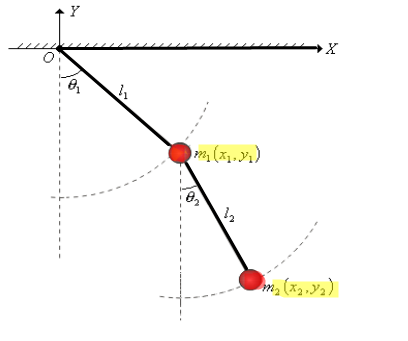

Los vectores de posición de las partículas 1 y 2 están dados por $(x_1,y_1)$ y $(x_2,y_2)$ respectivamente.

  El ángulo $\theta_1$ es el ángulo que forma el primer péndulo respecto al eje y negativo y
$\theta_2$ el ángulo que forma el segundo péndulo respecto al eje y negativo.

# **Ecuaciones de movimiento**





A partir de consideraciones trigonométricas tenemos que:
\begin{eqnarray}
x_1&=&l_1sinθ_1  \\\  y_1&=&l_2+l_1(1-cosθ_1)\\\  x_2&=&l_1sinθ_1 + l_2sinθ_2 \\\ y_2& = &l_2(2 − cosθ_2) − l_1(cosθ_1)
\end{eqnarray}



Derivando estas ecuaciones con respecto al tiempo obtenemos:
\begin{eqnarray}
\dot{x_1}&=&\dot{\theta_1}l_1cos\theta_1 \\\  \dot{y_1}&=&\dot{\theta_1}l_1sin\theta_1\\\  \dot{x_2}&=&\dot{x_1}+\dot{\theta_2}l_2cos\theta_2 \\\ \dot{y_2}& = &\dot{y_1}+\dot{\theta_2}l_2sin\theta_2   
\end{eqnarray}

Derivando nuevamente respecto al tiempo tenemos:
\begin{eqnarray}
\ddot{x_1}&=&-\dot{\theta_1}^2 l_1 sin\theta_1 + \ddot{\theta_1}l_1cos\theta_1 \\\  \ddot{y_1}&=&\dot{\theta_1}^2cos\theta_2+\ddot{theta_1}l_1 sin\theta_1 \\\  \ddot{x_2}&=& \ddot{x_1}-\dot{\theta_2}^2l_2sin\theta_2+\ddot{\theta_2}l_2cos\theta_2
 \\\ \ddot{y_2}& = & \ddot{y_1}+\dot{\theta_2}^2l_2cos\theta_2 + \ddot{\theta_2} l_2 sin\theta_2  
\end{eqnarray}

Teniendo en cuenta que la tensión y el peso son las únicas fuerzas que actúan 



sobre las masas y de la segunda ley de Newton tenemos que las ecuaciones de movimiento son:

\begin{eqnarray}
m_1\ddot{x_1}&=&-T_1 sin\theta_1 + T_2sin\theta_2 \\\  m_1\ddot{y_1}&=&T_1cos\theta_1-T_2cos\theta_2-m_1g \\\ \end{eqnarray}

Sobre la masa $m_2$, actúan T_2 y la gravedad $-m_2g$:


\begin{eqnarray}
 m_2\ddot{x_2}&=& -T_2sin\theta_2
 \\\ m_2\ddot{y_2}& = & T_2cos\theta_2-m_2g
\end{eqnarray}

De las ecuaciones anteriores, se obtienen las siguientes expresiones para $\ddot{\theta_1}$ y $\ddot{\theta}$
\begin{eqnarray}
    \ddot{\theta_1}&=&\frac{-2sin(\theta_1-\theta_2)m_2(\dot{\theta_2}^2l_2+\dot{\theta_1}^2l_1cos(\theta_1-\theta_2))}{l_1(2m_1+m_2-m_2cos(2\theta_1-2\theta_2))} \\\ \\\
    \ddot{\theta_2}&=&\frac{2sin(\theta_1-\theta_2)(\dot{\theta_1}^2l_1(m_1+m_2)+g(m_1+m_2)cos\theta_1+\dot{\theta_2}^2l_2m_2cos(\theta_1-\theta_2)}{l_2(2m_1+m_2-m_2cos(2\theta_1-2\theta_2))}
\end{eqnarray}

#**Análisis numérico**

In [1]:
#Librerías ===================================================================================
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from numpy.linalg import *
import scipy.integrate as integrate
from scipy import misc
import matplotlib.animation as animation
from matplotlib.patches import Circle, Wedge, Polygon

In [2]:
#X= np.radians([th1, w1, th2, w2])

def Doblependulo(X, t):

    w1 = X[1]        #Velocidad angular del primer péndulo

    Δθ = X[2] - X[0] #theta2-theta1
    
    den1 = (m1 + m2)*l1 - m2*l1*np.cos(Δθ)*np.cos(Δθ)

    dw1dt = (m2*l1*X[1]*X[1]*np.sin(Δθ)*np.cos(Δθ) +
               m2*g*np.sin(X[2])*np.cos(Δθ) +
               m2*l2*X[3]*X[3]*np.sin(Δθ) -
               (m1 + m2)*g*np.sin(X[0]))/den1

    w2 = X[3] #velocidad angular del segundo pendulo 

    den2 = (l2/l1)*den1
    dw2dt= (-m2*l2*X[3]*X[3]*np.sin(Δθ)*np.cos(Δθ) +
               (m1 + m2)*g*np.sin(X[0])*np.cos(Δθ) -
               (m1 + m2)*l1*X[1]*X[1]*np.sin(Δθ) -
               (m1 + m2)*g*np.sin(X[2]))/den2

   
    return[w1,dw1dt ,w2, dw2dt]

In [3]:
#Valores constantes=================================================

g = 9.8   # Aceleración de la gravedad m/s^2
l1 = 1.0  # Longitud de la barra 1 en m
l2 = 1.0  # Longitud de la barra 1 en m
m1 = 1.0  # Masa del pendulo 1 en kg
m2 = 1.0  # Masa de pendulo 2 en kg

In [4]:
# Creando un arreglo para el tiempo

dt = 0.05
t = np.arange(0.0, 10, dt)

# w10 y w20 son las velocidades iniciales (Grados por segundo)

th1 = 180 #ángulo en grados del primer pendulo
w1 = 0.0
th2 =180  #ángulo en grados del segundo pendulo
w2 = 0.0

 
#Arreglo de condiciones iniciales=================================================

X0 = np.radians([th1, w1, th2, w2])

# Integrando la Ecuación diferencial=========================================

y = integrate.odeint(Doblependulo,X0, t)


In [5]:
#Coordenadas de posición======================
def Posicion(Theta1,W1,Theta2,W2):
  x1 = l1*np.sin(Theta1)
  y1 = -l1*np.cos(Theta1)
  x2 = x1 + l2*np.sin(Theta2)
  y2 = y1 -np.cos(Theta2)*l2
  return [x1,y1,x2,y2]

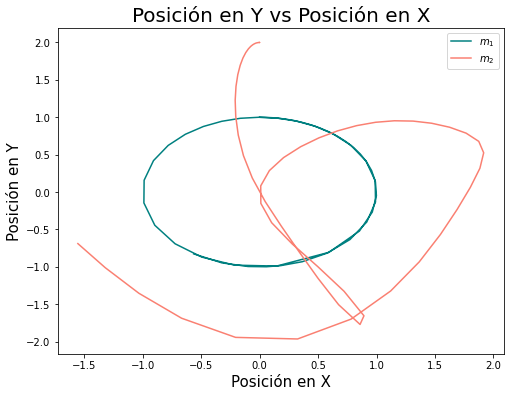

In [6]:
P=Posicion(y[:,0],y[:,1],y[:,2],y[:,3])

#Gráfico trayectorias
plt.figure(figsize=(8,6))
plt.plot(P[0],P[1], color= "teal", label= "$m_1$")
plt.plot(P[2],P[3], color= "salmon", label= "$m_2$")
plt.title("Posición en Y vs Posición en X", fontsize= 20)
plt.xlabel("Posición en X", fontsize= 15)
plt.ylabel("Posición en Y", fontsize= 15)
plt.legend()



##**Animación**

In [25]:

x1 = l1*np.sin(y[:,0])
y1 = -l1*np.cos(y[:,0])
x2 = x1 + l2*np.sin(y[:,2])
y2 = y1 -np.cos(y[:,2])*l2
#=======================================================================================================
fig = plt.figure(figsize=(8,6))
plt.close()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))


line, = ax.plot([], [], 'k-', lw=5,markersize=20,zorder=1)
patch = Circle((5, -5), 0.10,color='teal', fc='teal',zorder=2)
patch2 = Circle((5, -5), 0.10,color='salmon', fc='salmon',zorder=2)

ax.add_patch(patch)
ax.add_patch(patch2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    
    x, y = patch.center
    patch.center = (x1[i], y1[i])
    ax.add_patch(patch)
    
    x, y = patch2.center
    patch2.center = (x2[i], y2[i])
    ax.add_patch(patch2)
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=50, blit=True, init_func=init)

# ani.save('double_pendulum.mp4', fps=15)
from IPython.display import HTML
HTML(ani.to_jshtml())

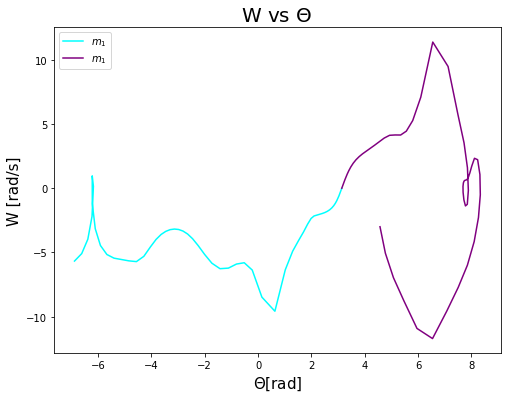

In [8]:
#Gráfico velocidad angular vs theta
plt.figure(figsize=(8,6))
plt.plot(y[:,0],y[:,1], color= "aqua", label= "$m_1$")
plt.plot(y[:,2],y[:,3], color= "purple", label= "$m_1$")
plt.title("W vs $\Theta$ ", fontsize= 20)
plt.xlabel("$\Theta$[rad]", fontsize= 15)
plt.ylabel("W [rad/s]", fontsize= 15)
plt.legend()

##**Energía**

La enegía cinética del sistema viene dada por:
$$K=\frac{1}{2}m_1(\dot{x_1}^2+\dot{y_1}^2)+\frac{1}{2}m_2(\dot{x_2}^2+\dot{y_2}^2)$$

La enegía potencial del sistema viene dada por:

$$ V=m_1y_1g+m_2y_2g$$

En coordenadas polares:
$$K = \frac{1}{2} l_1^2 \dot{θ_1}^2(m_1 + m_2) + \frac{1}{ 2} m_2l_2^2 \dot{θ_2}^2 + m_2l_1l_2\dot{θ_1}\dot{θ_2}cos(θ_1 − θ_2) $$
$$U=− m_1g(l_2 + l_1 + l_1cosθ_1) − m_2g(l_2 − l_2cosθ_2 + l_1 − l_1cosθ_1)$$


In [9]:
def K(Theta1,W1,Theta2,W2):
  t1=0.5*m1*(l1**2)*(W1)**2
  t2=0.5*m2*(l1**2*W1**2 + l2**2*W2**2) 
  t3=0.5*m2*(2*l1*l2*W1*W2*np.cos(Theta1-Theta2))
  return t1+t2+t3

def V(Theta1,W1,Theta2,W2):
  t1=-(m1+m2)*g*l1*np.cos(Theta1)
  t2=-m2*g*l2*np.cos(Theta2)
  return t1+t2

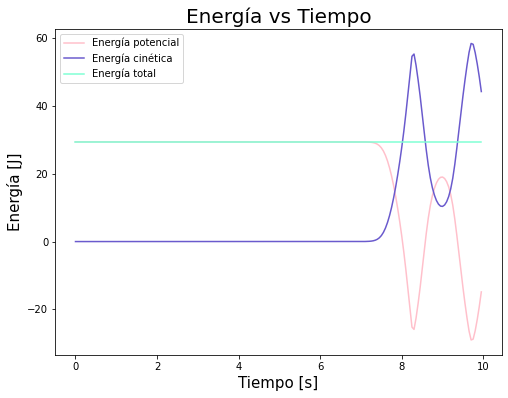

In [10]:
#Gráfico Energía vs Tiempo
plt.figure(figsize=(8,6))
plt.plot(t,V(y[:,0],y[:,1],y[:,2],y[:,3]), color= "pink", label= "Energía potencial")
plt.plot(t,K(y[:,0],y[:,1],y[:,2],y[:,3]), color= "slateblue", label= "Energía cinética")
plt.plot(t,V(y[:,0],y[:,1],y[:,2],y[:,3])+K(y[:,0],y[:,1],y[:,2],y[:,3]),  color= "aquamarine", label= "Energía total")
plt.title("Energía vs Tiempo", fontsize= 20)
plt.xlabel("Tiempo [s]", fontsize= 15)
plt.ylabel("Energía [J]", fontsize= 15)
plt.legend()

Considerando que el Lagrangiano se define como $L=K-V$

Tenemos que el Lagrangiano  del sistema es:

<center>

\begin{eqnarray}
L =\frac{1}{2}(m_1 + m_2) l_1^2 \dot{\theta}_1^2 &+&
	\frac{1}{2}m_2 l_2^2 \dot{\theta}_2^2 + m_2l_1l_2\dot{\theta}_1\dot{\theta}_2
	\cos(\theta_1 - \theta_2)\nonumber\\[3pt]
    &+&(m_1 + m_2) g l_1 \cos\theta_1 + m_2 g l_2\cos\theta_2
\end{eqnarray}


Derivando el anterior $\textbf{Lagrangiano}$ respecto a $\dot \theta_1$ y $\dot \theta_2$ tenemos lo momentos generalizados, los cuales son:

$$p_{\theta_1}=\frac{ \partial L}{\partial \dot \theta_1}=\dot \theta_1 l_1^2(m_1+m_2)+\dot \theta_2l_1l_2m_2\cos(\theta_2-\theta_1),$$
$$p_{\theta_2}=\frac{ \partial L}{\partial \dot \theta_2}=\dot \theta_2 l_2^2m_2+\dot \theta_1 l_1l_2m_2\cos(\theta_2-\theta_1).$$

In [11]:
#Momentum de m1
def Momentum(Theta1,W1,Theta2,W2):
  P1=W1*l1**2*(m1+m2) + W2*l1*l2*m2*np.cos(Theta2-Theta1)
  P2=W2*l2**2*m2 + W1*l1*l2*m2*np.cos(Theta2-Theta1)
  return [P1,P2]

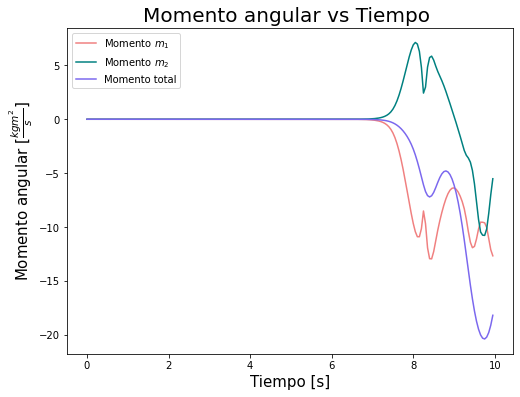

In [12]:
#MGráfico momentum
M=Momentum(y[:,0],y[:,1],y[:,2],y[:,3])
plt.figure(figsize=(8,6))
plt.plot(t,M[0],  color= "lightcoral", label= "Momento $m_1$")
plt.plot(t,M[1],  color= "teal", label= "Momento $m_2$")
plt.plot(t,M[0]+M[1],  color= "mediumslateblue", label= "Momento total")

plt.title("Momento angular vs Tiempo ", fontsize= 20)
plt.xlabel("Tiempo [s]", fontsize= 15)
plt.ylabel(r"Momento angular [$\frac{kgm^2}{s}$]", fontsize= 15)
plt.legend()


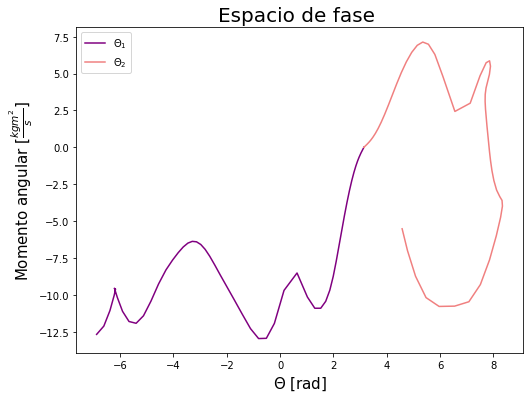

In [13]:
# Gráfico Espacio de Fase
plt.figure(figsize=(8,6))
plt.plot(y[:,0],M[0], color= "purple", label= "$\Theta_1$")
plt.plot(y[:,2],M[1], color= "lightcoral", label= "$\Theta_2$")
plt.title("Espacio de fase ", fontsize= 20)
plt.xlabel("$\Theta$ [rad]", fontsize= 15)
plt.ylabel(r"Momento angular [$\frac{kgm^2}{s}$]", fontsize= 15)
plt.legend()


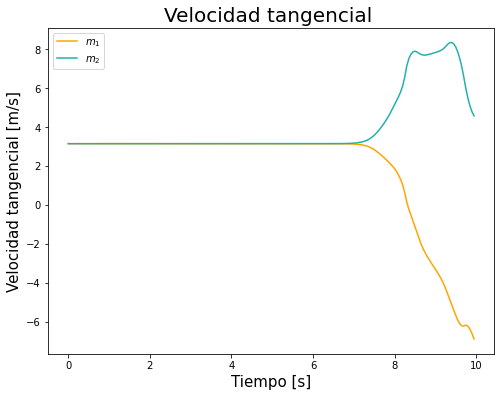

In [14]:
#Velocidad tangencial
V1=l1*y[:,0]
V2=l2*y[:,2]

#Gráfico velocidad tangencial
plt.figure(figsize=(8,6))
plt.plot(t,V1, color= "orange", label= "$m_1$")
plt.plot(t,V2, color= "lightseagreen", label= "$m_2$")
plt.title("Velocidad tangencial ", fontsize= 20)
plt.xlabel("Tiempo [s]", fontsize= 15)
plt.ylabel(r"Velocidad tangencial [m/s]", fontsize= 15)
plt.legend()


###**Puntos de Equilibrio**

Se define el equilibrio mecánico como al estado en que la fuerza neta y el momentum angular neto es cero en el sistema. Dada la relación entre energía y fuerza entonces los puntos de equilibrio coincidirán con los puntos donde ocurra un máximo o un mínimo locales de la energía potencial.

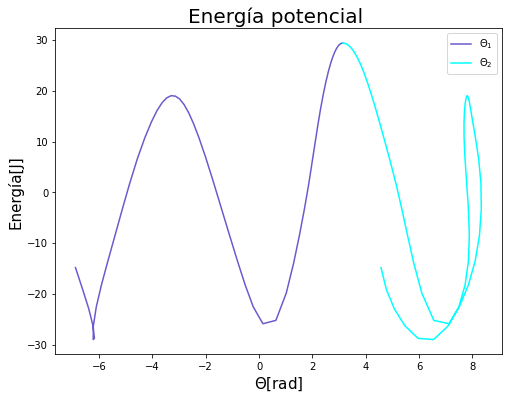

In [15]:
plt.figure(figsize=(8,6))
plt.plot(y[:,0],V(y[:,0],y[:,1],y[:,2],y[:,3]),color= "slateblue", label= "$\Theta_1$")
plt.plot(y[:,2],V(y[:,0],y[:,1],y[:,2],y[:,3]),color= "cyan", label= "$\Theta_2$")
plt.title("Energía potencial ", fontsize= 20)
plt.xlabel("$\Theta$[rad]", fontsize= 15)
plt.ylabel(r"Energía[J]", fontsize= 15)
plt.legend()


In [16]:
#Vectores de condiciones iniciales===========================================
#Puntos de equilibrio

#X= np.radians([th1, w1, th2, w2])
X1=np.radians([0,0,0,0])       #estable
X2=np.radians([0,0,180,0])
X3=np.radians([180,0,180,0])
X4=np.radians([180,0,0,0])


# Integrando la Ecuación diferencial=========================================

y1= integrate.odeint(Doblependulo,X1, t)
y2= integrate.odeint(Doblependulo,X2, t)
y3= integrate.odeint(Doblependulo,X3, t)
y4= integrate.odeint(Doblependulo,X4, t)

#Calculamos las posiciones m1 y m2 ====================
P1=Posicion(y1[:,0],y1[:,1],y1[:,2],y1[:,3])
P2=Posicion(y2[:,0],y2[:,1],y2[:,2],y2[:,3])
P3=Posicion(y3[:,0],y3[:,1],y3[:,2],y3[:,3])
P4=Posicion(y4[:,0],y4[:,1],y4[:,2],y4[:,3])

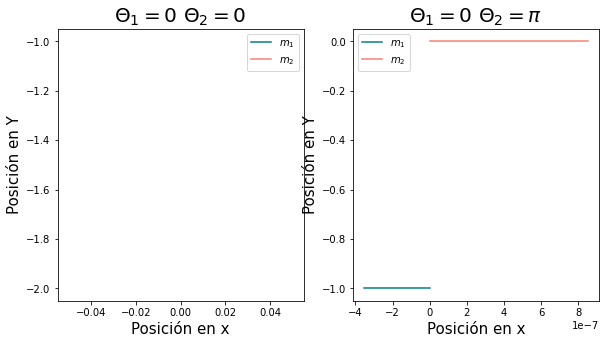

In [17]:
#Gráficos para distintas condiciones iniciales (segundo ángulo)
plt.figure(figsize=(15, 5))
plt.title("Trayectoria variando $\Theta_2$")

#Gráfico para theta1= 0 rad  theta2=0rad
plt.subplot(131)
plt.plot(P1[0],P1[1], color= "teal", label= "$m_1$")
plt.plot(P1[2],P1[3], color= "salmon", label= "$m_2$")
plt.title("$\Theta_1=0$ $\Theta_2=0$ ", fontsize= 20)
plt.xlabel("Posición en x", fontsize= 15)
plt.ylabel(r"Posición en Y", fontsize= 15)
plt.legend()

#Gráfico para theta1=0 rad  theta2=pi rad
plt.subplot(132)
plt.plot(P2[0],P2[1], color= "teal", label= "$m_1$")
plt.plot(P2[2],P2[3], color= "salmon", label= "$m_2$")
plt.title("$\Theta_1=0$ $\Theta_2=π$ ", fontsize= 20)
plt.xlabel("Posición en x", fontsize= 15)
plt.ylabel(r"Posición en Y", fontsize= 15)
plt.legend()

#

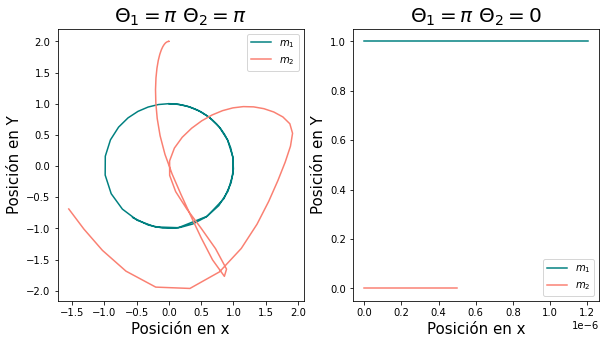

In [18]:
#Gráfico para theta1= pi rad  theta2=pi rad
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(P3[0],P3[1], color= "teal", label= "$m_1$")
plt.plot(P3[2],P3[3], color= "salmon", label= "$m_2$")
plt.title("$\Theta_1=π$ $\Theta_2=π$ ", fontsize= 20)
plt.xlabel("Posición en x", fontsize= 15)
plt.ylabel(r"Posición en Y", fontsize= 15)
plt.legend()

#Gráfico para theta1=pi rad  theta2=0 rad
plt.subplot(132)
plt.plot(P4[0],P4[1], color= "teal", label= "$m_1$")
plt.plot(P4[2],P4[3], color= "salmon", label= "$m_2$")
plt.title("$\Theta_1=π$ $\Theta_2=0$ ", fontsize= 20)
plt.xlabel("Posición en x", fontsize= 15)
plt.ylabel(r"Posición en Y", fontsize= 15)
plt.legend()

#**Comportamiento caótico**

Analizamos las treyectorias de los péndulos, variando un poco las condiciones iniciales, en un primer caso variando $\theta_2$ manteniendo $\theta_1$ constante luego variando $\theta1$ con $\theta_2$ constante . La longitud de las varillas y la masa de las partículas suspendidas las consideramos en todos los casos con el mismo valor.

In [19]:
#Valores constantes====================================================

g = 9.8   # Aceleración de la gravedad m/s^2
l1 = 1.0  # Longitud de la barra 1 en m
l2 = 1.0  # Longitud de la barra 1 en m
m1 = 1.0  # Masa del pendulo 1 en kg
m2 = 1.0  # Masa de pendulo 2 en kg


#Espacio del tiempo===============================================
dt = 0.05
t = np.arange(0.0, 10, dt)

In [20]:
#Vectores de condiciones iniciales===========================================

#Variando el segundo angulo 
X1=np.radians([180,0,359.99,0])
X2=np.radians([180,0,359.64,0]) 
X3=np.radians([180,0,360.36,0])

#Solución de la ecuación diferencial 
y1= integrate.odeint(Doblependulo,X1, t)
y2= integrate.odeint(Doblependulo,X2, t)
y3= integrate.odeint(Doblependulo,X3, t)

#Calculamos las posiciones m1 y m2 para cada caso
P1=Posicion(y1[:,0],y1[:,1],y1[:,2],y1[:,3])
P2=Posicion(y2[:,0],y2[:,1],y2[:,2],y2[:,3])
P3=Posicion(y3[:,0],y3[:,1],y3[:,2],y3[:,3])



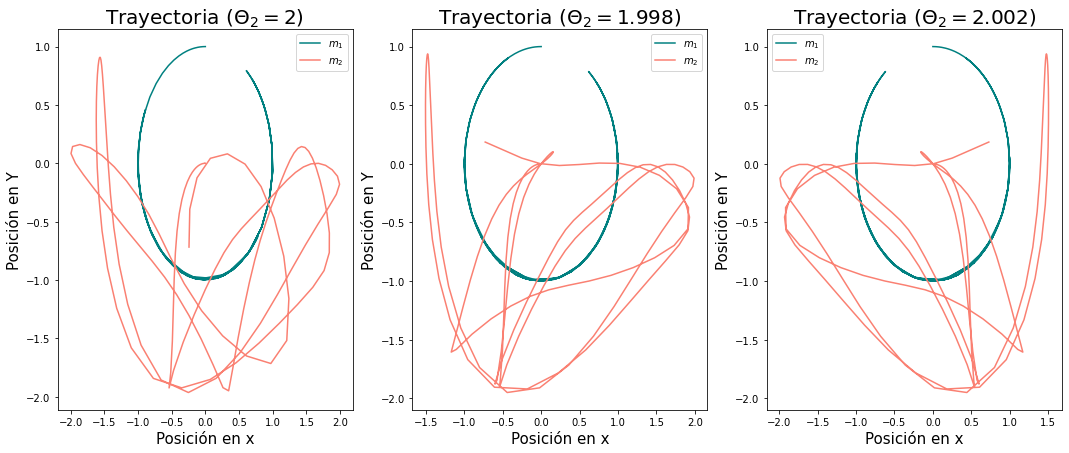

In [21]:
#Gráficos para distintas condiciones iniciales (segundo ángulo)
plt.figure(figsize=(18, 7))
plt.title("Trayectoria variando $\Theta_2$")

#Gráfico para theta2= 2 rad
plt.subplot(131)
plt.plot(P1[0],P1[1], color= "teal", label= "$m_1$")
plt.plot(P1[2],P1[3], color= "salmon", label= "$m_2$")
plt.title("Trayectoria ($\Theta_2=2$) ", fontsize= 20)
plt.xlabel("Posición en x", fontsize= 15)
plt.ylabel(r"Posición en Y", fontsize= 15)
plt.legend()

#Gráfico para theta2= 1.998 rad
plt.subplot(132)
plt.plot(P2[0],P2[1], color= "teal", label= "$m_1$")
plt.plot(P2[2],P2[3], color= "salmon", label= "$m_2$")
plt.title("Trayectoria ($\Theta_2=1.998$)", fontsize= 20)
plt.xlabel("Posición en x", fontsize= 15)
plt.ylabel(r"Posición en Y", fontsize= 15)
plt.legend()

#Gráfico para theta2= 2.002 rad
plt.subplot(133)
plt.plot(P3[0],P3[1], color= "teal", label= "$m_1$")
plt.plot(P3[2],P3[3], color= "salmon", label= "$m_2$")
plt.title("Trayectoria ($\Theta_2=2.002$)", fontsize= 20)
plt.xlabel("Posición en x", fontsize= 15)
plt.ylabel(r"Posición en Y", fontsize= 15)
plt.legend()

Los valores asignados en grados son equivalentes a $2 rad, 1.998 rad, 2.002 rad$
A pesar de que analitícamente se pueden considerar iguales, la trayectoria descrita por el péndulo cambia notablemente.

In [22]:
#Vectores de condiciones iniciales===========================================

#Variando el primer angulo 
X1=np.radians([-414,0,180,0])
X2=np.radians([-539.9982,0,180,0]) 
X3=np.radians([414.0018,0,180,0])

#Solución de la ecuación diferencial 
y1= integrate.odeint(Doblependulo,X1, t)
y2= integrate.odeint(Doblependulo,X2, t)
y3= integrate.odeint(Doblependulo,X3, t)

#Calculamos las posiciones m1 y m2 para cada caso
P1=Posicion(y1[:,0],y1[:,1],y1[:,2],y1[:,3])
P2=Posicion(y2[:,0],y2[:,1],y2[:,2],y2[:,3])
P3=Posicion(y3[:,0],y3[:,1],y3[:,2],y3[:,3])


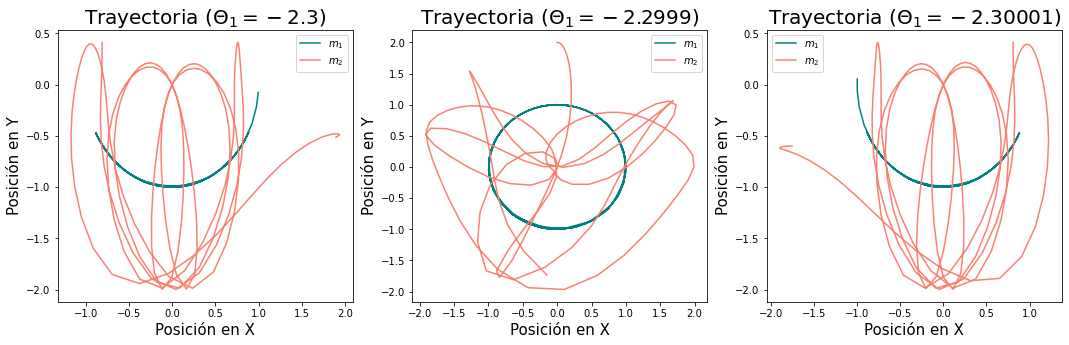

In [23]:
#Gráficos para distintas condiciones iniciales (primer ángulo)
plt.figure(figsize=(18, 5))

#Gráfico para theta1=-2.3 rad
plt.subplot(131)
plt.plot(P1[0],P1[1], color= "teal", label= "$m_1$")
plt.plot(P1[2],P1[3], color= "salmon", label= "$m_2$")
plt.title("Trayectoria ($\Theta_1=-2.3$)", fontsize= 20)
plt.xlabel("Posición en X", fontsize= 15)
plt.ylabel(r"Posición en Y", fontsize= 15)
plt.legend()

#Gráfico para theta1=-2.29999 rad
plt.subplot(132)
plt.plot(P2[0],P2[1], color= "teal", label= "$m_1$")
plt.plot(P2[2],P2[3], color= "salmon", label= "$m_2$")
plt.title("Trayectoria ($\Theta_1=-2.2999$)", fontsize= 20)
plt.xlabel("Posición en X", fontsize= 15)
plt.ylabel(r"Posición en Y", fontsize= 15)
plt.legend()

#Gráfico para theta1=-2.30001 rad
plt.subplot(133)
plt.plot(P3[0],P3[1],  color= "teal", label= "$m_1$")
plt.plot(P3[2],P3[3], color= "salmon", label= "$m_2$")
plt.title("Trayectoria ($\Theta_1=-2.30001$)", fontsize= 20)
plt.xlabel("Posición en X", fontsize= 15)
plt.ylabel(r"Posición en Y", fontsize= 15)
plt.legend()

##**Espacio de fase**

Text(0.5, 1.0, 'Espacio de fase de un péndulo doble')

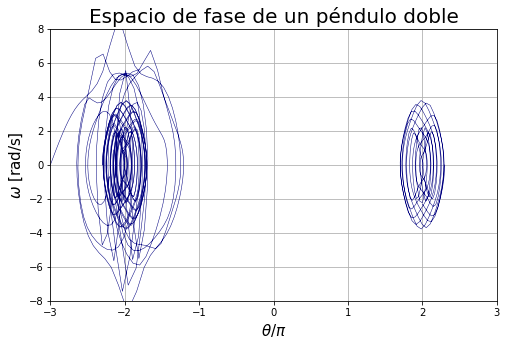

In [24]:
# Espacio de fase del péndulo doble con las condiciones iniciales anteriores
tmax = 6*np.pi #s
omega_max = 8 #rad/s
Nic = 1

#Valores iniciales
thetas1=np.radians([-414,-539.9982,414.0018])
thetas2=np.radians([359.99,359.64,360.36])
omega0s=np.zeros(3)


j=0
plt.figure( figsize = (8,5) )
for theta0, omega0 in zip(thetas1, omega0s):
  for theta1, omega1 in zip(thetas2,omega0s):
    t=np.linspace(0,tmax,400)
    U0=[theta0,omega0,theta1,omega1]   #vector de condiciones iniciales
    Us=integrate.odeint(Doblependulo,U0,t)
    plt.plot(Us[:,0]/np.pi,Us[:,1],lw = 0.5, color = "navy" )
    if j==Nic: #secutity stop
        break
    j=j+1
    
#Gráfico Espacio de fase
plt.xlabel( "$\\theta/\pi$", fontsize = 15 )
plt.ylabel( "$\omega$ [rad/s]", fontsize = 15 )
plt.xlim( (-3, 3) )
plt.ylim( (-omega_max, omega_max) )
plt.grid(1)  
plt.title( "Espacio de fase de un péndulo doble", fontsize=20 )

#**Conclusiones**

Según el análisis hecho para las primeras condiciones inciiales, podemos observar que la energía mecánica del sitema se conserva mientras que el momentum angular no.

Notamos que variando en cifras muy pequeñas las condiciones iniciales del sistema, la trayectoria descrita por los péndulo cambia considerablemente. Teniendo en cuenta que un sistema caótico se define aquel que bajo pequeñas variaciones en las condiciones iniciales presenta grandes diferencias en el comportamiento futuro, parece ser que el péndulo doble presenta un comportamiento caótico.

Para $(\theta_1,\theta_2) $(0, 0),(0, π),(π, π)
(π, 0) con velocidades angulares cero, estos puntos son en los que la fuerza de la gravedad, g, no influye sobre el movimiento. De la gráfica podemos inferir que el punto para el que los ángulos iniciales son ambos cero es un punto de equilibrio estable, mientras los otros son de equilibrio inestable.



##**Referencias**

Rod CrossA double pendulum swing experiment: In search of a better bat American Journal of
Physics 2005 73, 330-339 http://aapt.scitation.org/doi/abs/10.1119/1.1842729

https://es.wikipedia.org/wiki/Equilibrio_mecánico


Romer, R. H. A Double Pendulum “Art Machine” American Journal of Physics 1970 38:9,
1116-112 http://aapt.scitation.org/doi/pdf/10.1119/1.1976562

https://es.wikipedia.org/wiki/Doble_péndulo